In [147]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import matplotlib.patches as pats

### Function to return the gama function to describe biomass in relation to N upatake

In [2]:
def GamaFunct(X,gama):
    return (1+gama)*np.power(X,gama)-gama*np.power(X,(1+gama))

### Function that inverts (sort of) the gama function and returns a relative resource uptake for a given Biomass production

In [3]:
def CalcUptake(Biomass,gama):
    XRange = range(1001)
    XUptake = [float(X)/1000.0 for X in XRange]
    XBiomass = [GamaFunct(X,gama) for X in XUptake]
    Pairs = pd.DataFrame(index=XBiomass,data=XUptake,columns=['XUptake'])
    ind = (np.abs(np.subtract(XBiomass,Biomass))).argmin()
    return Pairs.iloc[ind][0]

### Function that makes the 4 quadrant plot and adds the upper limits to each quadrant

In [63]:
def MakeBasePlot(Xstart,XnonF,Xmax,Bmax,gama,Es,Er,PlotMax):
    Bscaller = float(Xmax)/float(Bmax) * 1.4
    Xs = Xstart + XnonF
    NegativeAxis = range(0,(int(PlotMax)+1)*-1,-1)
    PositiveAxis = range(0,(int(PlotMax)+1),1) 
    RelativeUptake = [min(1,float(X)/float(Xmax)) for X in PositiveAxis]
    Beta = [(1+gama)*np.power(X,gama)-gama*np.power(X,(1+gama)) for X in RelativeUptake]
    Biomass = [float(Bmax) * Bscaller * X for X in Beta]
    FieldAvailableN = np.multiply([X - Xstart - XnonF for X in NegativeAxis],Es)
    FieldUptakeN = [min(Xmax,np.multiply(X,Er))for X in PositiveAxis]
    FieldUstar =  [min(1,float(X*-1)/float(Xmax)) for X in FieldAvailableN]
    FieldBstar = [GamaFunct(X,gama) for X in FieldUstar]
    FieldBiomass = [float(Bmax) * Bscaller * X for X in FieldBstar]
    Graph = plt.figure(figsize=(12,12))
    Soil = plt.plot(NegativeAxis,FieldAvailableN,color='brown',linewidth=3)
    Root = plt.plot(FieldUptakeN,NegativeAxis,color='orange',linewidth=3)
    Shoot = plt.plot(PositiveAxis,Biomass,color='green',linewidth=3)
    Field = plt.plot(NegativeAxis,FieldBiomass,color='blue',linewidth=3)
    Grid1 = plt.plot([0,0],[-(PlotMax*2),PlotMax*2],color='k')
    Grid2 = plt.plot([-(PlotMax*2),PlotMax*2],[0,0],color='k')
    plt.ylim(-(PlotMax*1.15),(Bmax * Bscaller * 1.15))
    plt.xlim(-(PlotMax*1.15),PlotMax*1.15)
    plt.yticks([-(PlotMax),0,Bmax * Bscaller],[PlotMax,0,Bmax],fontsize=16)
    plt.xticks([-PlotMax,0,PlotMax],[PlotMax,0,PlotMax],fontsize=16)
    plt.text(PlotMax*0.25,-PlotMax*1.25,'Crop N Uptake (kg/ha)',fontsize=18)
    plt.text(-PlotMax*1.25,-PlotMax*0.25,'Soil N Available (kg/ha)',fontsize=18,rotation=90)
    plt.text(-PlotMax*0.9,-PlotMax*1.25,'Fertiliser N Inputs (kg/ha)',fontsize=18)
    plt.text(-PlotMax*1.25,PlotMax*0.75,'Crop Biomass (kg/ha)',fontsize=18,rotation=90)
    plt.text(-PlotMax*1.1,PlotMax,'Field',fontsize=20)
    plt.text(-PlotMax*1.1,-PlotMax*1.1,'Soil',fontsize=20)
    plt.text(PlotMax*0.9,-PlotMax*1.1,'Roots',fontsize=20)
    plt.text(PlotMax*0.85,PlotMax,'Canopy',fontsize=20)

### Function that plots observed data onto quadrants

In [137]:
def PlotObs(Data,Xmax,Bmax,Symbol,Colour):
    Bscaller = float(Xmax)/float(Bmax) * 1.4
    ObsSoil = plt.plot(Data.Nfert * -1,Data.ObsNAvl * -1,Symbol,color=Colour,markersize = 9)
    ObsRoot = plt.plot(Data.ObsUptake,Data.ObsNAvl * -1,Symbol,color=Colour,markersize = 9)
    ObsShoot = plt.plot(Data.ObsUptake,Data.ObsBiom * Bscaller,Symbol,color=Colour,markersize = 9)
    ObsField = plt.plot(Data.Nfert * -1,Data.ObsBiom * Bscaller,Symbol,color=Colour,markersize = 9)

### Function that identitites fitted to observed data series

In [62]:
def PlotFits(Xmax,Xstart,XnonF,Bmax,Bact,gama,Es,Er,Line,PlotMax):
    NegativeAxis = range(0,(PlotMax+1)*-1,-1)
    PositiveAxis = range(0,(PlotMax+1),1)
    
    Xact = CalcUptake(float(Bact)/float(Bmax),gama) * Xmax
    Bscaller = float(Xmax)/float(Bmax) * 1.4
    Ustar = [min(1,float(X)/float(Xmax)) for X in PositiveAxis]
    Bstar = [(1+gama)*np.power(X,gama)-gama*np.power(X,(1+gama)) for X in Ustar]
    FitBiomass = [float(Bmax) * Bscaller * X for X in Bstar]
    FitAvailableN = np.multiply([X-Xstart-XnonF for X in NegativeAxis],float(Es))
    FitUptakeN = [min(Xact,np.multiply(X*-1,float(Er)))for X in FitAvailableN]
    FitUstar =  [min(1,float(X)/float(Xmax)) for X in FitUptakeN]
    FitBstar = [GamaFunct(X,gama) for X in FitUstar]
    FitFieldBiomass = [float(Bmax) * Bscaller * X for X in FitBstar]
    
    FitSoil = plt.plot(NegativeAxis,FitAvailableN,Line,color='brown',linewidth=3)
    FitRoot = plt.plot(FitUptakeN,FitAvailableN,Line,color='orange',linewidth=3)
    FitShoot = plt.plot(PositiveAxis,FitBiomass,Line,color='green',linewidth=3)
    FitField = plt.plot(NegativeAxis,FitFieldBiomass,Line,color='blue',linewidth=3)

### Function to plot the path of walking about the quadrants for a given input and set of efficiencies

In [6]:
def PlotWalk(InputN,Xmax,Xstart,XnonF,gama,Es,Er,Bact,Bmax,line):
    Xs = Xstart + XnonF 
    Xact = CalcUptake(float(Bact)/float(Bmax),gama) * Xmax
    Bscaller = float(Xmax)/float(Bmax) * 1.4
    WalkCoords = pd.DataFrame(index = [0,1,2,3,4],columns=['X','Y'])
    WalkCoords.ix[0,'Y'] = 0                                   #Startpoint
    WalkCoords.ix[0,'X'] = -InputN      #Fertiliserinputs                        
    WalkCoords.ix[1,'X'] = WalkCoords.ix[0,'X']
    WalkCoords.ix[1,'Y'] = -(InputN + Xstart + XnonF)*Es  # Available N
    WalkCoords.ix[2,'Y'] = WalkCoords.ix[1,'Y']
    WalkCoords.ix[2,'X'] = min(np.abs(WalkCoords.ix[2,'Y']*Er),Xact)  # Untake N
    WalkCoords.ix[3,'X'] = WalkCoords.ix[2,'X']
    Ustar = float(WalkCoords.ix[3,'X'])/Xmax
    Bstar = GamaFunct(Ustar,gama)
    if Ustar < 1:
        WalkCoords.ix[3,'Y'] = Bstar * Bmax * Bscaller   #Biomass 
    else:
        WalkCoords.ix[3,'Y'] = Bmax * Bscaller           #Biomass
    WalkCoords.ix[4,'X'] = WalkCoords.ix[1,'X']
    WalkCoords.ix[4,'Y'] = WalkCoords.ix[3,'Y']
    
    WalkPlot = plt.plot(WalkCoords.X,WalkCoords.Y,line,color='k')

# Maize Example

In [9]:
MaizeData = pd.read_pickle('MaizeData.pkl')
MaizeMeans = MaizeData.groupby(level=['Irrig','Fert'],axis=0).mean()
MaizeSD = MaizeData.groupby(level=['Irrig','Fert'],axis=0).std()

In [10]:
MaizeMeans

Plot  Block     ObsY  ObsBiom  Nfert     ObsNAvl   ObsUptake
Irrig Fert                                                               
Full  000N  11.25    2.5  10995.0  20208.0    0.0  179.142235  161.449451
      075N  11.75    2.5  12803.0  24427.0   75.0  230.517831  208.752922
      250N  14.00    2.5  15209.0  28339.0  250.0  327.836900  281.167581
Nil   000N  12.75    2.5   3464.0   7677.0    0.0  131.836657   53.288483
      075N  13.25    2.5   5264.0  11051.0   75.0  229.943587   88.213740
      250N  12.00    2.5   6202.0  11928.0  250.0  331.103314   93.022908

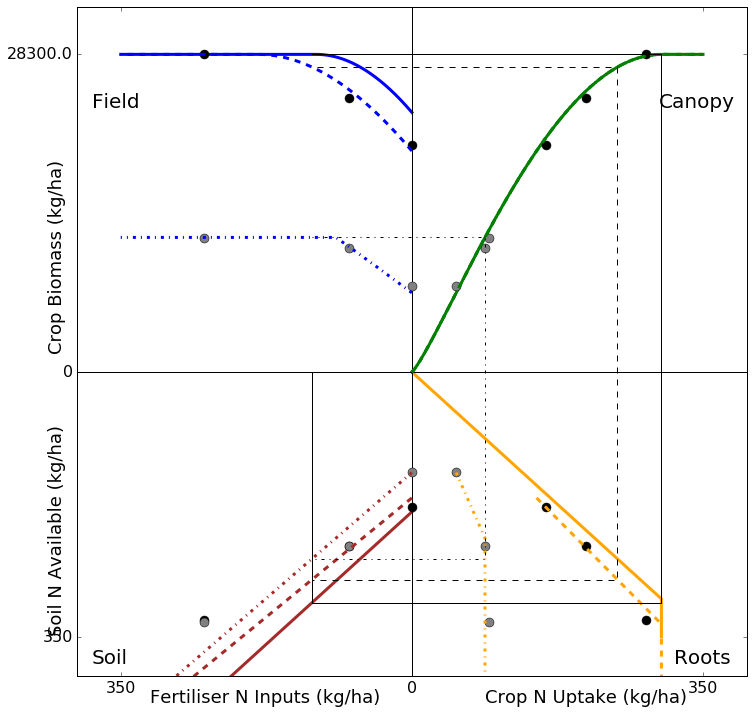

In [75]:
PlotMax = 350
Xmax = 300.0
Bmax = 28300.0
gama = 1.2

#Create axes and plot potentials
# MakeBasePlot(Xstart,XnonF,Xmax,Bmax,gama,Es,Er,PlotMax):
MakeBasePlot(47,138,Xmax,Bmax,gama,1,1,PlotMax)

#Put observed values on plot
#PlotObs(Data,Xmax,Bmax,Symbol,Colour):
PlotObs(MaizeMeans.ix['Full',:],Xmax,Bmax,'o','k')
PlotObs(MaizeMeans.ix['Nil',:],Xmax,Bmax,'o','grey')

#Fit identities to observed values
#PlotFits(Xmax,Xstart,XnonF,Bmax,Bact,gama,Es,Er,Line,PlotMax):
PlotFits(Xmax,47,138,Bmax,28300,gama,0.9,0.9,'--',PlotMax)
PlotFits(Xmax,47,93,Bmax,12000,gama,0.95,0.4,'-.',PlotMax)

#Plot the coordinates to walk around the identity at a given level of input
#PlotWalk(InputN,Xmax,Xstart,XnonF,gama,Es,Er,Bact,Bmax,line):
PlotWalk(120,Xmax,47,138,gama,1.0,1.0,Bmax,Bmax,'-')
PlotWalk(120,Xmax,47,138,gama,0.9,0.9,28300,Bmax,'--')
PlotWalk(120,Xmax,47,93,gama,0.95,0.4,12000,Bmax,'-.')

# Cocksfoot example

In [7]:
CocksFoot = pd.read_pickle('CocksFoot.pkl')

In [19]:
CocksFoot.ix[:15,:]

,Irrigation,Nfert,ObsNAvl,ObsUptake,ObsBiom
Irrigation,,,,,
dry,dry,19.928258,24.187750,14.449377,39.465687
dry,dry,10.210593,11.501525,3.458918,11.197294
dry,dry,13.898541,14.607853,0.709646,2.896627
dry,dry,14.152279,14.628297,0.674911,1.911184
dry,dry,18.563208,20.329609,6.111575,15.109984
dry,dry,23.719165,26.677117,11.552557,27.588177
dry,dry,37.313433,42.215600,33.033252,70.226138
dry,dry,44.809559,48.175628,31.862318,73.631620
dry,dry,35.103115,38.480311,9.729990,23.955449


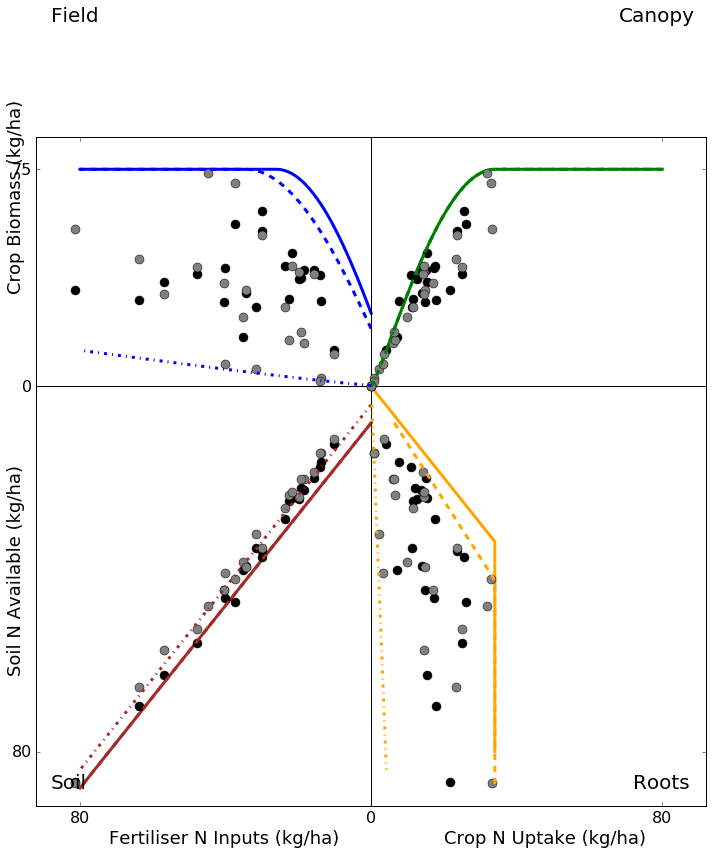

In [72]:
PlotMax = 80
Xmax = 34.0
Bmax = 75
gama = 1.2

#Create axes and plot potentials
# MakeBasePlot(Xstart,XnonF,Xmax,Bmax,gama,Es,Er,PlotMax):
MakeBasePlot(0,8,Xmax,Bmax,gama,1,1,PlotMax)

#Put observed values on plot
#PlotObs(Data,Xmax,Bmax,Symbol,Colour):
PlotObs(CocksFoot.ix['irr',:],Xmax,Bmax,'o','k')
PlotObs(CocksFoot.ix['dry',:],Xmax,Bmax,'o','grey')

#Fit identities to observed values
#PlotFits(Xmax,Xstart,XnonF,Bmax,Bact,gama,Es,Er,Line,PlotMax):
PlotFits(Xmax,0,8,Bmax,75,gama,1,0.8,'--',PlotMax)
PlotFits(Xmax,0,4,Bmax,75,gama,1,0.05,'-.',PlotMax)

# #Plot the coordinates to walk around the identity at a given level of input
# #PlotWalk(InputN,Xmax,Xstart,XnonF,gama,Es,Er,Bact,Bmax,line):
# PlotWalk(200,Xmax,47,138,gama,1.0,1.0,Bmax,Bmax,'-')
# PlotWalk(200,Xmax,47,138,gama,0.9,0.9,28300,Bmax,'--')
# PlotWalk(200,Xmax,47,93,gama,0.95,0.4,12000,Bmax,'-.')

# Sugar Cane example

In [122]:
SugarKane = pd.read_pickle('SugarKane.pkl')

In [123]:
SugarKane

Year           Fert  ObsY     ObsBiom  Nfert     ObsNAvl  \
Year Fert                                                                      
2004 N0             2004             N0     8   57.000000      0   76.082712   
     N35            2004            N35    68   68.000000     35   91.686184   
     N70            2004            N70    94   94.000000     70  129.465500   
     N140           2004           N140   109  108.666667    140  177.667688   
     N210           2004           N210   114  114.333333    210  270.970578   
     N Replacement  2004  N Replacement    94   94.000000     83  124.415268   
2005 N0             2005             N0    54   54.333333      0   67.742713   
     N35            2005            N35    61   60.666667     35         NaN   
     N70            2005            N70    99   98.666667     70  101.476197   
     N140           2005           N140   105  104.666667    140  140.761945   
     N210           2005           N210   116  115.666667    210  181.266333   
     N Replacement  2005  N Replacement    93   93.333333     94  118.749408   
2006 N0             2006             N0    80   79.666667      0  129.572377   
     N35            2006            N35    88   88.000000     35         NaN   
     N70            2006            N70    99   99.333333     70  161.530723   
     N140           2006           N140    99   99.000000    140  144.854613   
     N210           2006           N210   101  101.000000    210  314.573150   
     N Replacement  2006  N Replacement   102  101.666667    106  151.000694   
2007 N0             2007             N0    56   56.333333      0  125.631786   
     N35            2007            N35    70   70.333333     35  108.810104   
     N70            2007            N70    98   98.333333     70  128.875952   
     N140           2007           N140   103  103.333333    140  165.934296   
     N210           2007           N210   110  110.333333    210  265.331418   
     N Replacement  2007  N Replacement   107  107.333333    106  174.432655   

                     ObsUptake  
Year Fert                       
2004 N0              47.871359  
     N35             62.880243  
     N70             89.588500  
     N140           121.455396  
     N210           137.195853  
     N Replacement   92.868250  
2005 N0              47.576532  
     N35                   NaN  
     N70             86.538674  
     N140           104.904464  
     N210           138.155124  
     N Replacement   96.119867  
2006 N0              96.513021  
     N35                   NaN  
     N70            124.996347  
     N140           121.387841  
     N210           140.741141  
     N Replacement  121.664292  
2007 N0              79.949300  
     N35             75.249636  
     N70            102.692196  
     N140           136.193634  
     N210           182.883054  
     N Replacement  133.340096

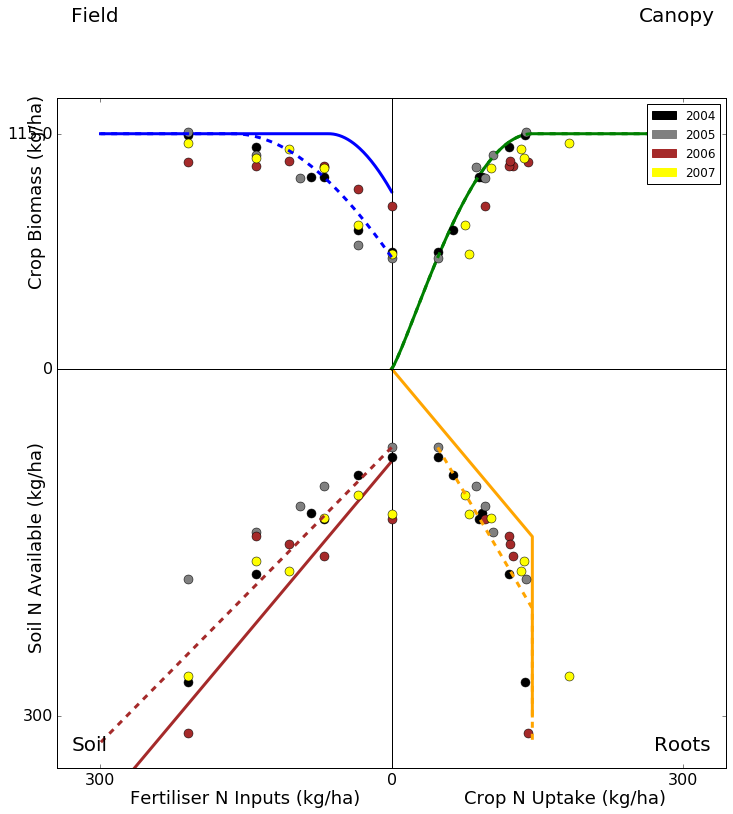

In [160]:
PlotMax = 300
Xmax = 145.0
Bmax = 115.0
gama = 1.2

#Create axes and plot potentials
# MakeBasePlot(Xstart,XnonF,Xmax,Bmax,gama,Es,Er,PlotMax):
MakeBasePlot(80,0,Xmax,Bmax,gama,1,1,PlotMax)

#Put observed values on plot
#PlotObs(Data,Xmax,Bmax,Symbol,Colour):
PlotObs(SugarKane.ix[2004,:],Xmax,Bmax,'o','black')
blackPoint = pats.Circle(1,1,color='black')
PlotObs(SugarKane.ix[2005,:],Xmax,Bmax,'o','grey')
greyPoint = pats.Circle(1,1,color='grey')
PlotObs(SugarKane.ix[2006,:],Xmax,Bmax,'o','brown')
brownPoint = pats.Circle(1,1,color='brown')
PlotObs(SugarKane.ix[2007,:],Xmax,Bmax,'o','yellow')
yellowPoint = pats.Circle(1,1,color='yellow')

plt.legend([blackPoint,greyPoint,brownPoint,yellowPoint], ['2004','2005','2006','2007'])

#Fit identities to observed values
# #PlotFits(Xmax,Xstart,XnonF,Bmax,Bact,gama,Es,Er,Line,PlotMax):
PlotFits(Xmax,80,0,Bmax,120,gama,0.85,0.7,'--',PlotMax)
#PlotFits(Xmax,26,109,Bmax,120,gama,0.85,0.8,'-.',PlotMax)

# #Plot the coordinates to walk around the identity at a given level of input
# #PlotWalk(InputN,Xmax,Xstart,XnonF,gama,Es,Er,Bact,Bmax,line):
# PlotWalk(120,Xmax,47,138,gama,1.0,1.0,Bmax,Bmax,'-')
# PlotWalk(120,Xmax,47,138,gama,0.9,0.9,28300,Bmax,'--')
# PlotWalk(120,Xmax,47,93,gama,0.95,0.4,12000,Bmax,'-.')

In [120]:
SatoKebi = pd.read_clipboard()

In [121]:
SatoKebi.set_index(['Year','Fert'],inplace=True,drop=False)
SatoKebi.to_pickle('SugarKane.pkl')